# Fundamentos del algoritmo de Gillespie

Populating the interactive namespace from numpy and matplotlib


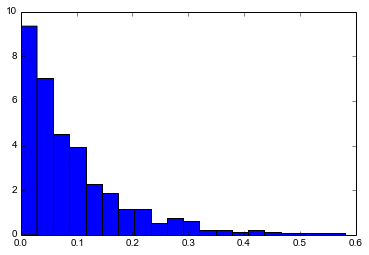

In [8]:
%pylab inline
numeros=random.rand(500)
numeros=-(1/10.)*log(numeros)
b=20  #bin number
y,x,z=hist(numeros,bins=b,normed=True)

In [9]:
x_prom=empty(len(x)-1)
for i in range(len(x)-1):
    x_prom[i]=((x[i]+x[i+1])*0.5)

In [10]:
from scipy.optimize import curve_fit
def exponencial(x,lamb):
    return lamb*exp(-x*lamb)

Al hacer un fit, el lambda encontrado fue  11.0373456363 +- 0.0481884249272  mostrando que efectivamente tiene una forma de distribucion exponencial


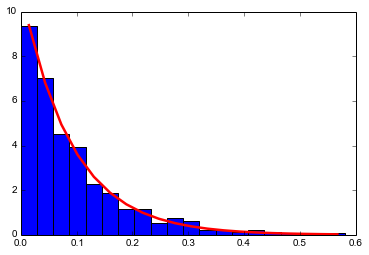

In [11]:
p_opt,p_cov=curve_fit(exponencial,x_prom,y)
y_fit=exponencial(x_prom,*p_opt)
bar(x_prom,y,width=(x[-1]+x[0])/b,align='center')
plot(x_prom,y_fit,lw=2.5,c='r')
print "Al hacer un fit, el lambda encontrado fue ",str(p_opt[0]),"+-",str(p_cov[0][0])," mostrando que efectivamente tiene una forma de distribucion exponencial"

## Parte c

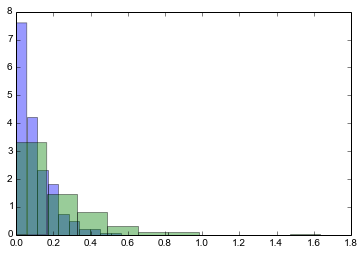

In [12]:
n=500
binis=10
k=10.
r=5.
tiempo_A=empty(n)
tiempo_B=empty(n)
for i in range(n):
    ta=-1./k*(log(random.random()))
    tb=-1./r*(log(random.random()))
    tiempo_A[i]=ta
    tiempo_B[i]=tb
y_a,lim_a,z_a=hist(tiempo_A,alpha=0.4,bins=binis,color='blue', normed=True)
y_b,lim_b,z_b=hist(tiempo_B,alpha=0.4,bins=binis,color='green', normed=True)
lim_a_prom=empty(len(y_a))
lim_b_prom=empty(len(y_b))
for i in range(len(y_a)):
    lim_a_prom[i]=((lim_a[i]+lim_a[i+1])*0.5)
    lim_b_prom[i]=((lim_b[i]+lim_b[i+1])*0.5)

Al hacer los ajustes, los lambda encontrados para A y B respectivamente fueron  9.95448273535 +- 0.0656852419495  y  4.84611000339 +- 0.0134255421445


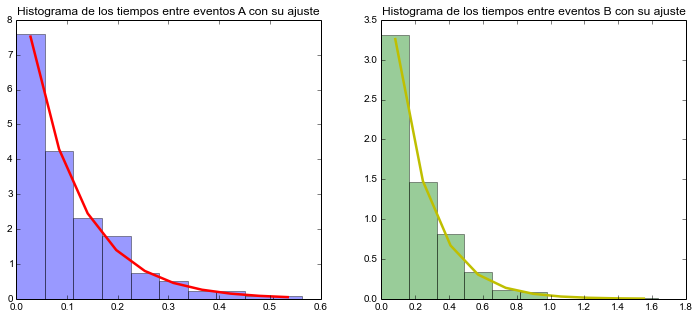

In [13]:
a_opt,a_cov=curve_fit(exponencial,lim_a_prom,y_a)
b_opt,b_cov=curve_fit(exponencial,lim_b_prom,y_b)
a_fit=exponencial(lim_a_prom,*a_opt)
b_fit=exponencial(lim_b_prom,*b_opt)
subplots(1,2,figsize=(12,5))
subplot(1, 2, 1)
title('Histograma de los tiempos entre eventos A con su ajuste')
bar(lim_a_prom,y_a,width=(lim_a[-1]+lim_a[0])/binis,align='center',alpha=0.4,color='b')
plot(lim_a_prom,a_fit,lw=2.5,c='r')
subplot(1, 2, 2)
title('Histograma de los tiempos entre eventos B con su ajuste')
bar(lim_b_prom,y_b,width=(lim_b[-1]+lim_b[0])/binis,align='center',alpha=0.4,color='g')
plot(lim_b_prom,b_fit,lw=2.5,c='y')
print "Al hacer los ajustes, los lambda encontrados para A y B respectivamente fueron ",str(a_opt[0]),"+-",str(a_cov[0][0])," y ",str(b_opt[0]),"+-",str(b_cov[0][0])

In [14]:
print "El valor promedio para los tiempos entre eventos A es ",float(average(tiempo_A)), "mientras que para B es",float(average(tiempo_B)), ". Esto es consistente con 1/k=1/10=0.1 y 1/r=1/5=0.2"

El valor promedio para los tiempos entre eventos A es  0.101354375149 mientras que para B es 0.203499391276 . Esto es consistente con 1/k=1/10=0.1 y 1/r=1/5=0.2
